**[MHP-01]**

Import modules.


In [0]:
import numpy as np
from pandas import DataFrame
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[MHP-02]**

Define the MontyHall class to simulate the game.

In [0]:
class MontyHall:
  def __init__(self, doors=3, hints=1):
    self.doors = doors
    self.hints = hints

  def play(self, change):
    choice = 0
    prize = np.random.randint(self.doors)
    selectable = [True] * self.doors
    selectable[choice] = False
    selectable[prize] = False

    # Open some unselected doors
    selectable_to_open = [n for n in range(self.doors) if selectable[n]]
    for c in np.random.choice(selectable_to_open, self.hints, replace=False):
      selectable[c] = False

    if change:  # Change the choice
      if choice != prize:
        selectable[prize] = True
      selectable_to_choose = [c for c in range(self.doors) if selectable[c]]
      choice = np.random.choice(selectable_to_choose, 1, replace=False)[0]

    if choice == prize:
      return 1    # Win
    else:
      return 0    # Lose

**[MHP-03]**

Define a function to play the game for multiple times.

In [0]:
def trials(monty_hall, change, num=10000):
  results = []
  for _ in range(num):
    results.append(monty_hall.play(change=change))
  return sum(results) / num

**[MHP-04]**

Create a MantyHall instance.

In [0]:
monty_hall = MontyHall()

**[MHP-05]**

Play games with a policy not to change the door.

In [0]:
trials(monty_hall, change=False)

0.336

**[MHP-06]**

Play games with a policy to change the door.

In [0]:
trials(monty_hall, change=True)

0.6683

**[MHP-07]**

Play games for various numbers of doors.

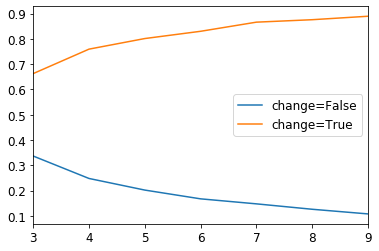

In [0]:
doors_range = range(3, 10)
results1, results2 = [], []
for doors in doors_range:
  monty_hall = MontyHall(doors=doors, hints=doors-2)
  results1.append(trials(monty_hall, change=False))
  results2.append(trials(monty_hall, change=True))

ax = DataFrame({'change=False': results1,
                'change=True': results2}).plot()
_ = ax.set_xticklabels(doors_range)